In [36]:
from datetime import datetime
import pandas as pd

In [72]:
dates = pd.date_range('2020-04-04', '2020-06-02')
dates = dates.strftime('z%d-%B-%Y')

In [75]:
# dumb date manipulation
dates = dates.str.replace('z0', '').str.replace('z', '')

# basically we need to change '01-July-2020' into '1-July-2020'

In [219]:
scrapes = []

for date in dates:
    filename = f'COVID-19-daily-announced-deaths-{date}.xlsx'
    print(filename)
    try:
        raw_file = pd.read_excel(filename, sheet_name='COVID19 daily deaths by trust', skiprows=13)
    except:
        raw_file = pd.read_excel(filename, sheet_name='Tab4 Deaths by trust', skiprows=13)
    good_cols = [c for c in raw_file.columns 
                 if c == 'Name' or isinstance(c, datetime)]
    scrape = raw_file[good_cols].dropna(axis=0, how='all')
    scrape.iloc[0, 0] = 'ENG'
    scrape = scrape.set_index('Name').unstack()
    
    # drop duplicates
    scrape = scrape[~scrape.index.duplicated(keep='last')]
    scrapes.append(scrape)

COVID-19-daily-announced-deaths-4-April-2020.xlsx
COVID-19-daily-announced-deaths-5-April-2020.xlsx
COVID-19-daily-announced-deaths-6-April-2020.xlsx
COVID-19-daily-announced-deaths-7-April-2020.xlsx
COVID-19-daily-announced-deaths-8-April-2020.xlsx
COVID-19-daily-announced-deaths-9-April-2020.xlsx
COVID-19-daily-announced-deaths-10-April-2020.xlsx
COVID-19-daily-announced-deaths-11-April-2020.xlsx
COVID-19-daily-announced-deaths-12-April-2020.xlsx
COVID-19-daily-announced-deaths-13-April-2020.xlsx
COVID-19-daily-announced-deaths-14-April-2020.xlsx
COVID-19-daily-announced-deaths-15-April-2020.xlsx
COVID-19-daily-announced-deaths-16-April-2020.xlsx
COVID-19-daily-announced-deaths-17-April-2020.xlsx
COVID-19-daily-announced-deaths-18-April-2020.xlsx
COVID-19-daily-announced-deaths-19-April-2020.xlsx
COVID-19-daily-announced-deaths-20-April-2020.xlsx
COVID-19-daily-announced-deaths-21-April-2020.xlsx
COVID-19-daily-announced-deaths-22-April-2020.xlsx
COVID-19-daily-announced-deaths-23-Ap

In [220]:
final = pd.concat(scrapes, axis=1).sum(axis=1)

In [221]:
final = final.unstack().fillna(0)

In [224]:
final = final.cumsum()

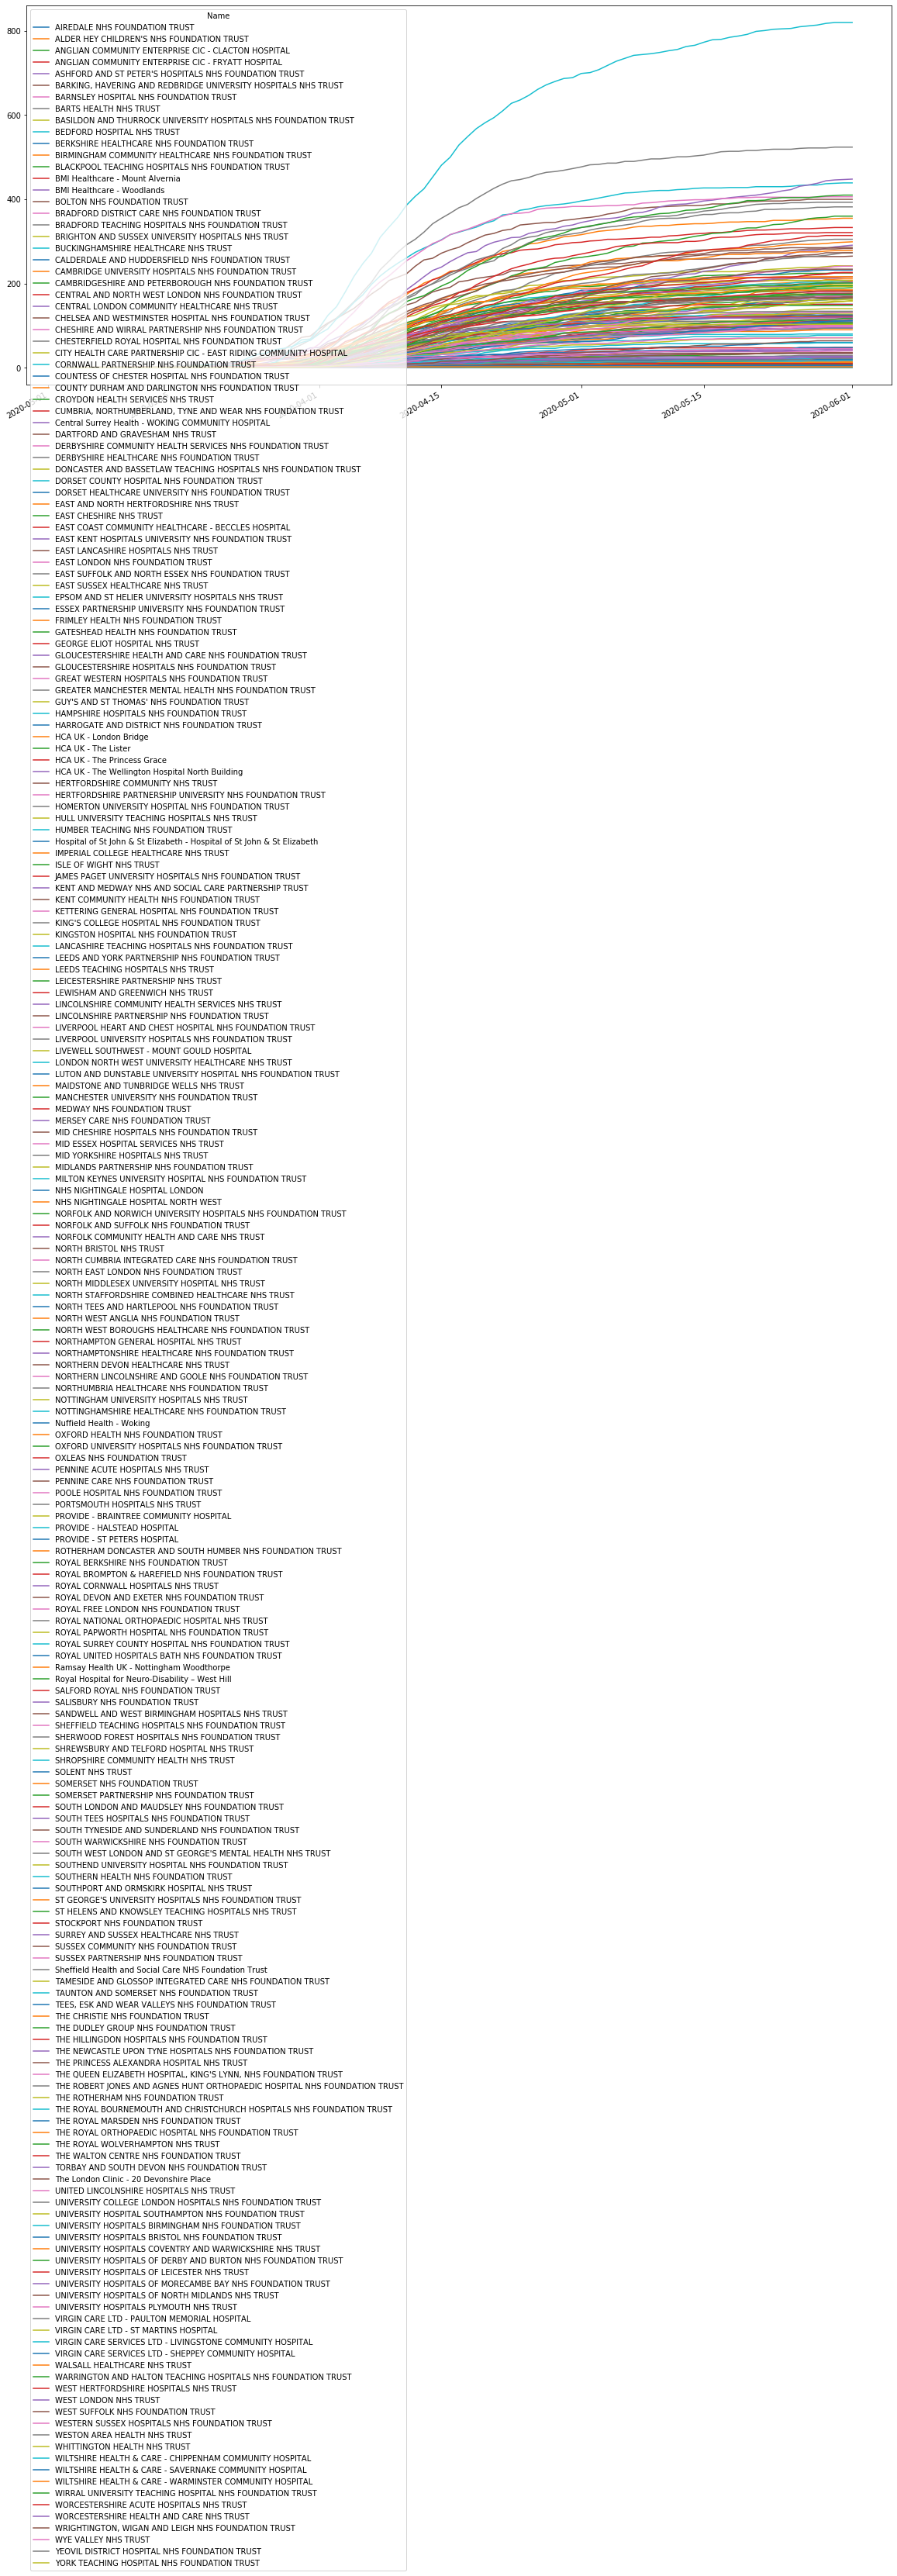

In [226]:
final.drop('ENG', axis=1).plot(figsize=(20,10))

In [228]:
final.to_csv('hospital_deaths.csv')